In [2]:
import matplotlib.pyplot as plt
import numpy as np

from slap2_utils.datafile import DataFile
from slap2_utils.subclasses.metadata import MetaData
from slap2_utils.utils.trace import Trace




28
MetaData Loaded
[-10203, 229.0, 231.0, 233.0, 235.0, 237.0, 239.0, 241.0, 243.0, 245.0, 247.0, 249.0, 251.0, 253.0, 255.0, 257.0, 259.0, 261.0, 263.0, 265.0, 267.0, 269.0, 271.0, 273.0, 275.0, 277.0, 279.0, 281.0, 283.0]
103888


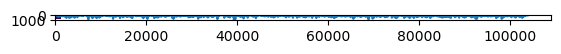

In [5]:
hDataFile = DataFile('C:\\Users\\Jerry\\Desktop\\240109_Sim3D\\WorkingFile_20231220_150500_DMD1.dat');
roi_shape = hDataFile.metaData.AcquisitionContainer.ROIs[3].shapeData
#metaData.AcquisitionContainer.ROIs[0].shapeData
zIdx = hDataFile.fastZs.index(hDataFile.metaData.AcquisitionContainer.ROIs[3].z)
#print(zIdx)
chIdx = 1;

from skimage.draw import polygon_perimeter

roi_shape = hDataFile.metaData.AcquisitionContainer.ROIs[3].shapeData

img = np.zeros((800, 1280), dtype=np.uint8)

rr, cc = polygon_perimeter(roi_shape[0,:], roi_shape[1,:],

                           shape=img.shape, clip=True)


# VERY IMPORTANT
for i in range(len(rr)):
    rr[i] = rr[i] - 1
    
for j in range(len(cc)):
    cc[j] = cc[j] - 1

img[rr, cc] = 1

plt.imshow(img)

#rasterPixels = pixelMask;
#integrationPixels = pixelMask;

pixelMask=np.full((800, 1280), False)
pixelMask[img==1] = True

rasterPixels = np.full((800, 1280), False)
integrationPixels = pixelMask;
hTrace = Trace(hDataFile, zIdx, chIdx)
i = 0
for i in range(len(pixelMask)):
    try:
        x = np.where(pixelMask[i] == 1)
        if len(x[0]) == 0:
            raise ValueError
        #print(i)
        #print(x)
    except ValueError:
        continue
hTrace.setPixelIdxs(rasterPixels, integrationPixels);
#windowWidth_lines = 10;
#expectedWindowWidth_lines = 100;
#trace = hTrace.process(windowWidth_lines,expectedWindowWidth_lines);
_trace, _, _, _ = hTrace.process(10, 100)
print(len(_trace))
plt.plot(_trace)

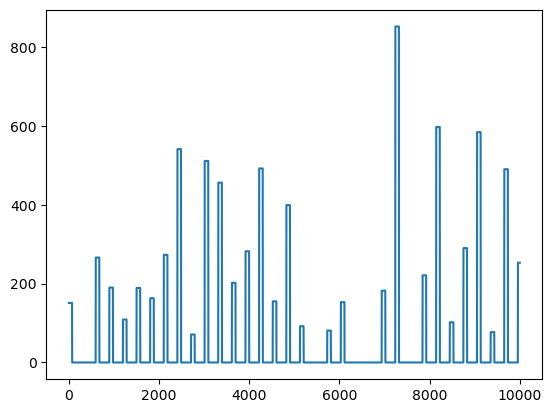

In [6]:
plt.plot(_trace[0:10000])
#x=[]
#i=3
#while (i<10000):
#    x.append(_trace[i])
#    i=i+53
#plt.plot(x)    



28
MetaData Loaded
[-10203, 229.0, 231.0, 233.0, 235.0, 237.0, 239.0, 241.0, 243.0, 245.0, 247.0, 249.0, 251.0, 253.0, 255.0, 257.0, 259.0, 261.0, 263.0, 265.0, 267.0, 269.0, 271.0, 273.0, 275.0, 277.0, 279.0, 281.0, 283.0]
103888


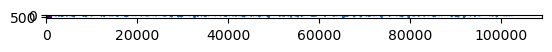

In [7]:
hDataFile = DataFile('C:\\Users\\Jerry\\Desktop\\240109_Sim3D\\WorkingFile_20231220_150500_DMD1.dat');
roi_shape = hDataFile.metaData.AcquisitionContainer.ROIs[0].shapeData
#metaData.AcquisitionContainer.ROIs[0].shapeData
zIdx = hDataFile.fastZs.index(hDataFile.metaData.AcquisitionContainer.ROIs[0].z)
#print(zIdx)
chIdx = 1;

from skimage.draw import polygon_perimeter

roi_shape = hDataFile.metaData.AcquisitionContainer.ROIs[0].shapeData

img = np.zeros((800, 1280), dtype=np.uint8)

rr, cc = polygon_perimeter(roi_shape[0,:], roi_shape[1,:],

                           shape=img.shape, clip=True)


# VERY IMPORTANT
for i in range(len(rr)):
    rr[i] = rr[i] - 1
    
for j in range(len(cc)):
    cc[j] = cc[j] - 1

img[rr, cc] = 1

plt.imshow(img)

#rasterPixels = pixelMask;
#integrationPixels = pixelMask;

pixelMask=np.full((800, 1280), False)
pixelMask[img==1] = True

rasterPixels = np.full((800, 1280), False)
integrationPixels = pixelMask;
hTrace = Trace(hDataFile, zIdx, chIdx)
i = 0
for i in range(len(pixelMask)):
    try:
        x = np.where(pixelMask[i] == 1)
        if len(x[0]) == 0:
            raise ValueError
        #print(i)
        #print(x)
    except ValueError:
        continue
hTrace.setPixelIdxs(rasterPixels, integrationPixels);
#windowWidth_lines = 10;
#expectedWindowWidth_lines = 100;
#trace = hTrace.process(windowWidth_lines,expectedWindowWidth_lines);
_trace, _, _, _ = hTrace.process(10, 100)
print(len(_trace))
plt.plot(_trace)

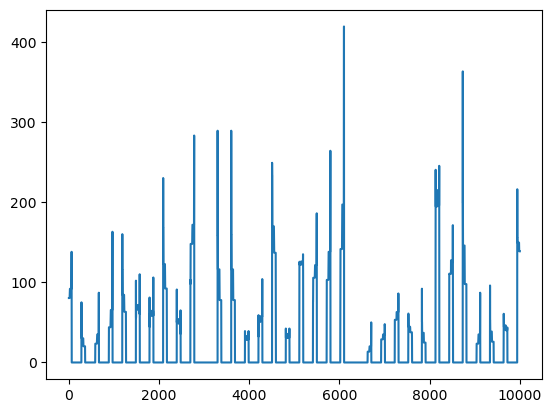

In [8]:
plt.plot(_trace[0:10000])

In [14]:
import numpy as np

# Create a 2D NumPy array with 1s and 0s
array_2d = np.array([[0, 1, 0],
                     [1, 0, 1],
                     [0, 1, 1]])

# Find indices where the value is 1
indices = np.where(array_2d == 1)
print(indices)
coordinates = list(zip(indices[0], indices[1]))
print(coordinates)
my_array = np.array([[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 9]])
# Find the maximum value along the rows (axis=1)
max_values_along_rows = np.max(my_array, axis=1)

# Find the maximum value along the columns (axis=0)
max_values_along_columns = np.max(my_array, axis=0)

print("Maximum values along rows:", max_values_along_rows)
print("Maximum values along columns:", max_values_along_columns)
def find_non_overlapping_areas(areas):
    non_overlapping_indices = []

    # Iterate through each area
    for i in range(len(areas)):
        area1 = areas[i]
        overlaps = False

        # Check against all other areas
        for j in range(len(areas)):
            if i != j:  # Avoid self-comparison
                area2 = areas[j]

                # Check if the two areas overlap
                if overlap(area1, area2):
                    overlaps = True
                    break

        # If no overlaps were found, add the index to the result
        if not overlaps:
            non_overlapping_indices.append(i)

    return non_overlapping_indices


def overlap(area1, area2):
    # Check if two areas overlap along the x-axis or y-axis
    overlap_x = not (area1[1][0] < area2[0][0] or area1[0][0] > area2[1][0])
    overlap_y = not (area1[1][1] < area2[0][1] or area1[0][1] > area2[1][1])

    # Return True if there is any overlap along both axes
    return overlap_x and overlap_y


# Example usage
areas_list = [
    ([-1, -1], [1, 1]),  # Area 0
    ([2, 2], [4, 4]),    # Area 1
    ([0, 0], [3, 3]),    # Area 2
    ([5, 5], [6, 6])     # Area 3
]

non_overlapping_indices = find_non_overlapping_areas(areas_list)

print("Non-overlapping indices:", non_overlapping_indices)

(array([0, 1, 1, 2, 2], dtype=int64), array([1, 0, 2, 1, 2], dtype=int64))
[(0, 1), (1, 0), (1, 2), (2, 1), (2, 2)]
Maximum values along rows: [3 6 9]
Maximum values along columns: [7 8 9]
Non-overlapping indices: [3]


In [ ]:
hDataFile.header[j]

In [ ]:
print(hDataFile.metaData.AcquisitionContainer.ParsePlan['acqParsePlan'][6:9])
(hDataFile.metaData.AcquisitionContainer.ParsePlan['acqParsePlan'][9:13])